In [270]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [271]:
cd /content/drive/MyDrive/SLO

/content/drive/MyDrive/SLO


In [341]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from keras.models import Sequential
from keras.layers.core import Activation  
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

## **PCA**

In [280]:
np.random.seed(5)

centers = [[1,1], [-1,-1], [1,-1]]
kanker = datasets.load_breast_cancer()
X = kanker.data
y = kanker.target
ya= kanker.target


[]

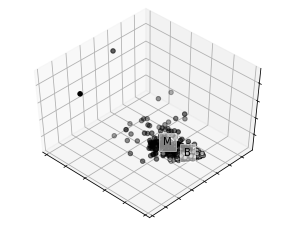

In [322]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('M', 0), ('B', 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [282]:
lb = LabelBinarizer()
labels = lb.fit_transform(ya)

In [283]:
(trainX_pca, testX_pca, trainY_pca, testY_pca) = train_test_split(X, np.array(labels), random_state=3, test_size=0.2)
print(trainX_pca.shape)
print(testX_pca.shape)
print(trainY_pca.shape)
print(testY_pca.shape)

(455, 3)
(114, 3)
(455, 1)
(114, 1)


In [284]:
#model ANN

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(3,)), #hidden layer 1
        Dense(32, activation="relu"), #hidden layer 2
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(1, activation = "sigmoid"),
    ]
)

In [285]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_75 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_76 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_77 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 9         
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [286]:

# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(learning_rate=1e-3, decay=1e-3 / 50)
model.compile(loss="binary_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H = model.fit(trainX_pca, trainY_pca, validation_data=(testX_pca, testY_pca), epochs=20, batch_size=20)

[INFO] training network...
Epoch 1/20
23/23 [==============================] - 1s 17ms/step - loss: 2.8944 - accuracy: 0.7855 - val_loss: 0.3335 - val_accuracy: 0.9298
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.1927 - accuracy: 0.9245 - val_loss: 0.2284 - val_accuracy: 0.9298
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.9420 - val_loss: 0.3055 - val_accuracy: 0.9211
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9385 - val_loss: 0.3115 - val_accuracy: 0.9211
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.9336 - val_loss: 0.3539 - val_accuracy: 0.9298
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1585 - accuracy: 0.9518 - val_loss: 0.3423 - val_accuracy: 0.9298
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9515 - val_loss: 0.2938 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


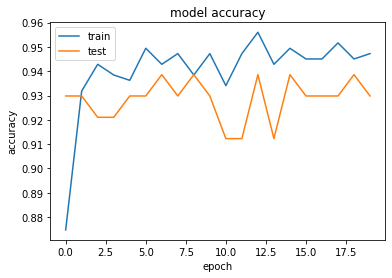

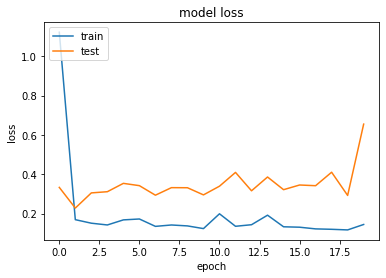

In [287]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **LDA**

In [330]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [331]:
kanker = datasets.load_breast_cancer()

X = kanker.data
y = kanker.target
target_names = kanker.target_names

In [332]:
lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(X, y).transform(X)
#colors = ['navy', 'darkorange']
#plt.figure()
#for color, i, target_name in zip(colors, [0, 1], target_names):
 #   plt.scatter(X_r2[y == i, 0], alpha=.8, color=color,label=target_name)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('LDA of IRIS dataset')

#plt.show()

In [333]:
X_r2.shape

(569, 1)

In [334]:
lb = LabelBinarizer()
labels = lb.fit_transform(y)

In [335]:
(trainX_lda, testX_lda, trainY_lda, testY_lda) = train_test_split(X_r2, np.array(labels), random_state=3, test_size=0.2)
print(trainX_lda.shape)
print(testX_lda.shape)
print(trainY_lda.shape)
print(testY_lda.shape)

(455, 1)
(114, 1)
(455, 1)
(114, 1)


In [336]:
#model ANN

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(1,)), #hidden layer 1
        Dense(32, activation="relu"), #hidden layer 2
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(1, activation = "sigmoid"),
    ]
)

In [337]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_90 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_91 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_92 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 9         
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [339]:

# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(learning_rate=1e-3, decay=1e-3 / 50)
model.compile(loss="binary_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H = model.fit(trainX_lda, trainY_lda, validation_data=(testX_lda, testY_lda), epochs=20, batch_size=20)

[INFO] training network...
Epoch 1/20
23/23 [==============================] - 1s 18ms/step - loss: 0.6379 - accuracy: 0.5839 - val_loss: 0.5682 - val_accuracy: 0.9737
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.9507 - val_loss: 0.5042 - val_accuracy: 0.9737
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.9517 - val_loss: 0.4792 - val_accuracy: 0.9737
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.9689 - val_loss: 0.4629 - val_accuracy: 0.9737
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.9700 - val_loss: 0.3009 - val_accuracy: 0.9649
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9852 - val_loss: 0.1514 - val_accuracy: 0.9561
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9883 - val_loss: 0.1159 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


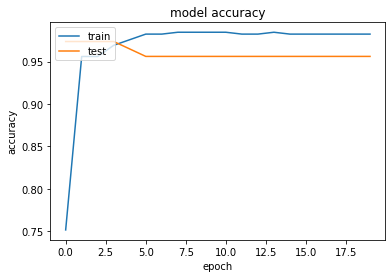

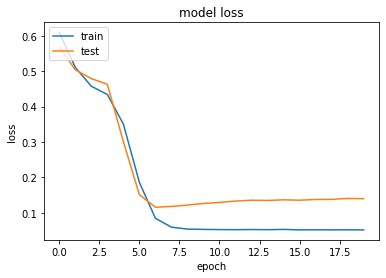

In [340]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **FA**

In [342]:
from sklearn.decomposition import FactorAnalysis

In [343]:
kanker = datasets.load_breast_cancer()

X = kanker.data
y = kanker.target

In [345]:
fa = FactorAnalysis(n_components=3)
kanker_tiga_dim = fa.fit_transform(kanker.data)
kanker_tiga_dim.shape

(569, 3)

In [346]:
lb = LabelBinarizer()
labels = lb.fit_transform(y)

In [347]:
(trainX_fa, testX_fa, trainY_fa, testY_fa) = train_test_split(kanker_tiga_dim, np.array(labels), random_state=3, test_size=0.2)
print(trainX_fa.shape)
print(testX_fa.shape)
print(trainY_fa.shape)
print(testY_fa.shape)

(455, 3)
(114, 3)
(455, 1)
(114, 1)


In [348]:
#model ANN

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(3,)), #hidden layer 1
        Dense(32, activation="relu"), #hidden layer 2
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(1, activation = "sigmoid"),
    ]
)

In [349]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_95 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_96 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_97 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 9         
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [351]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(learning_rate=1e-3, decay=1e-3 / 50)
model.compile(loss="binary_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H = model.fit(trainX_fa, trainY_fa, validation_data=(testX_fa, testY_fa), epochs=20, batch_size=20)

[INFO] training network...
Epoch 1/20
23/23 [==============================] - 1s 18ms/step - loss: 0.6481 - accuracy: 0.8149 - val_loss: 0.5517 - val_accuracy: 0.9123
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.9403 - val_loss: 0.3843 - val_accuracy: 0.9123
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.9416 - val_loss: 0.2338 - val_accuracy: 0.9123
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9459 - val_loss: 0.1776 - val_accuracy: 0.9123
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.9408 - val_loss: 0.1680 - val_accuracy: 0.9298
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1444 - accuracy: 0.9423 - val_loss: 0.1668 - val_accuracy: 0.9386
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.1213 - accuracy: 0.9563 - val_loss: 0.1720 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


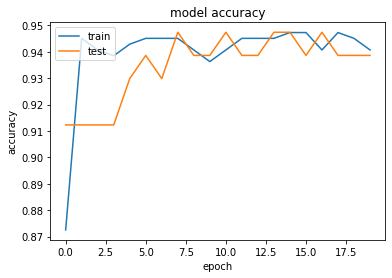

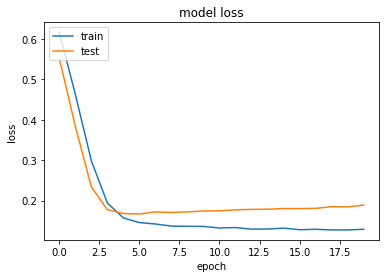

In [352]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()